# PREDICTION OF SYRIATEL CUSTOMERS PREFERENCE AND CHURN

## OVERVIEW

SyriaTel, a telecommunications company has commissioned an anlysis to  better understand the  customers' preferences and predict whether a customer will stop doing business with the company or not. The aim of the project is to leverage historical customer data to identify key factors influencing customer behavior with a focus on predicting customer churn.

## DATA UNDERSTANDING
This dataset has been derrived from [Churn in Telecoms Dataset on Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) containing detailed information on customer usage, service preferences and interaction history. 
The dataset enables a comprehensive analysis of factors that may influence customer satisfaction, preferences and the likelihood of churn offering SyriaTel detailed recommendations to improve service offerings and mainatain their customer base. 


## OBJECTIVES
* Analyze how customers usage trends such as call minutes during the day, evening and at night to identify their key preferences that influence their retention into SyriaTel Communications.
* Develop a predictive model to forecast whether a customer will stop doing business with SyriaTel (churn) based on their service usage and customer support interactions.
* Assess how various service features such as international plans, voicemail plans and customer service calls influence customer satisfaction and churn to understand which aspects of the services offered most affect customer loyalty and which areas need improvements.



## DATA PREPARATION AND PRESENTATION

### IMPORTING RELEVANT LIBRARIES

Pandas - Enable manipulation of imported datasets saved as dataframes.

Numpy - Enable computation of mathematical functions as well as perform array operations.

Seaborn- Enable visualization of the data.

Matplotlib.pyplot - Additional library to help in data visualization.

sklearn.linearmodel_selection - Enables splitting the dataset into training and testing sets, cross-validation and hyperparameter tuning.

sklearn.preprocessing - Contains preprocessing functions suitabe for machine learning operations 

sklearn.tree - Enables building decision tree models for classification.

sklearn.metrics - Enables evaluation of model performance based on various metrics




In [2]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc


### LOAD AND REVIEW THE DATASET

Once the libraries have been imported, load and review the dataset.

In [8]:
#load and view the first 5 rows
df_syria = pd.read_csv('SyriaTel/bigml_59c28831336c6604c800002a.csv')
df_syria.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
# check for duplicated in the df_syria dataframe
df_syria.duplicated().value_counts()

False    3333
Name: count, dtype: int64

In [14]:
# check for missing values in each column of the dataframe
df_syria.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The analysis shows that the dataset has no duplicated entries or missing values across any columns.

In [20]:
numerical_columns = df_syria.select_dtypes(include=[np.number]).columns


In [23]:
# check for outliers using z-score
from scipy.stats import zscore
# Calculate z-score for numerical columns
z_score = np.abs(zscore(df_syria[numerical_columns]))
z_score.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,0.676489,0.523603,1.234883,1.566767,0.476643,1.567036,0.070610,0.055940,0.070427,0.866743,0.465494,0.866029,0.085008,0.601195,0.085690,0.427932
1,0.149065,0.523603,1.307948,0.333738,1.124503,0.334013,0.108080,0.144867,0.107549,1.058571,0.147825,1.059390,1.240482,0.601195,1.241169,0.427932
2,0.902529,0.523603,0.591760,1.168304,0.675985,1.168464,1.573383,0.496279,1.573900,0.756869,0.198935,0.755571,0.703121,0.211534,0.697156,1.188218
3,0.428590,0.688834,0.591760,2.196596,1.466936,2.196759,2.742865,0.608159,2.743268,0.078551,0.567714,0.078806,1.303026,1.024263,1.306401,0.332354
4,0.654629,0.523603,0.591760,0.240090,0.626149,0.240041,1.038932,1.098699,1.037939,0.276311,1.067803,0.276562,0.049184,0.601195,0.045885,1.092641


The data above shows that most of the  z-scores are within the range of -3 to 3, indicating ther is no significant outliers. Row 3 has relatively high evening usage as it is indicated in the total eve minutes and total eve charge with z-scores above 2.7, suggesting long evening calls.

### EXPLANATORY DATA ANALYSIS(EDA)

* #### Analyze how customers usage trends such as call minutes during the day, evening and at night to intergrate and align with SyriaTel Communications call rates.

Analyzing how call minutes during the day, evening and at night influence their retention or churn.

To get a better understanding of customer call patterns and churn, plot boxplots of total day minutes,evening call minutes and night call minutes side by side. THis allows for visual comparison of call usage patterns differ from customers who churn and those who doesn't churn.  

C:\Users\User\AppData\Local\Temp\ipykernel_10760\4194598655.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_syria['churn'], y=df_syria['total day minutes'], palette="Reds_d")
C:\Users\User\AppData\Local\Temp\ipykernel_10760\4194598655.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_syria['churn'], y=df_syria['total eve minutes'], palette="Blues_d")


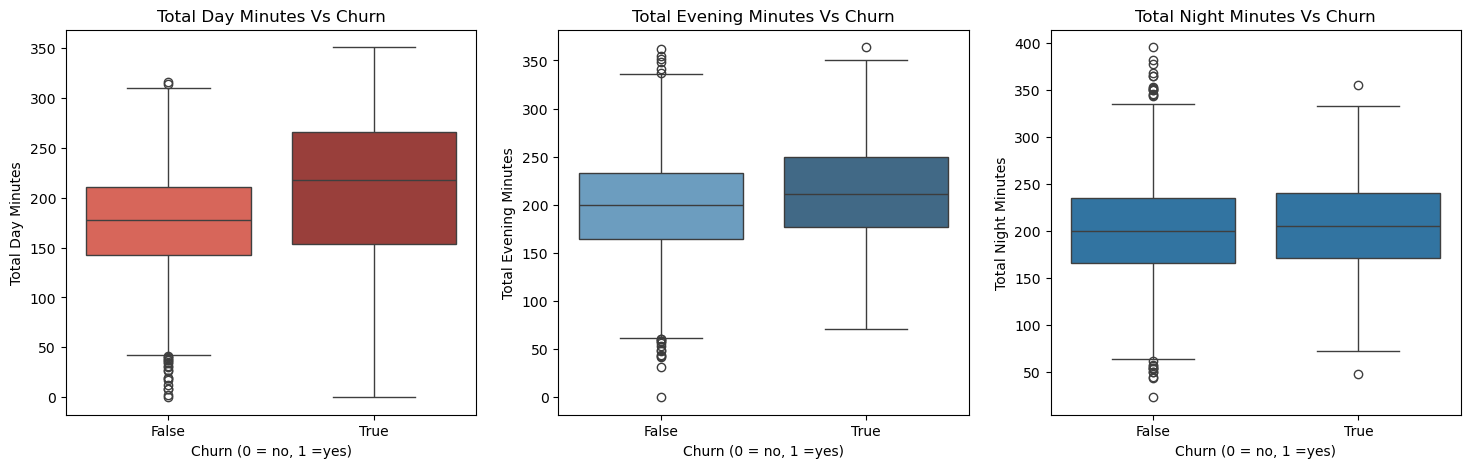

In [29]:
plt.figure(figsize=(18,5))
#Total day minutes vs churn boxplot
plt.subplot(1,3,1)
sns.boxplot(x=df_syria['churn'], y=df_syria['total day minutes'], palette="Reds_d")
plt.title('Total Day Minutes Vs Churn')
plt.xlabel('Churn (0 = no, 1 =yes)')
plt.ylabel('Total Day Minutes')

#Total evening minutes vs churn boxplot
plt.subplot(1,3,2)
sns.boxplot(x=df_syria['churn'], y=df_syria['total eve minutes'], palette="Blues_d")
plt.title('Total Evening Minutes Vs Churn')
plt.xlabel('Churn (0 = no, 1 =yes)')
plt.ylabel('Total Evening Minutes')

#Total night minutes vs churn boxplot
plt.subplot(1,3,3)
sns.boxplot(x=df_syria['churn'], y=df_syria['total night minutes'])
plt.title('Total Night Minutes Vs Churn')
plt.xlabel('Churn (0 = no, 1 =yes)')
plt.ylabel('Total Night Minutes')

plt.show()

From the above box plots......(interpretation of the above)
Plot a scatter diagram  of Total day minutes, Total evening minutes and total night minutes vs churn  to analyze the relationship between total day minutes, total evening minutes and total night minutes.

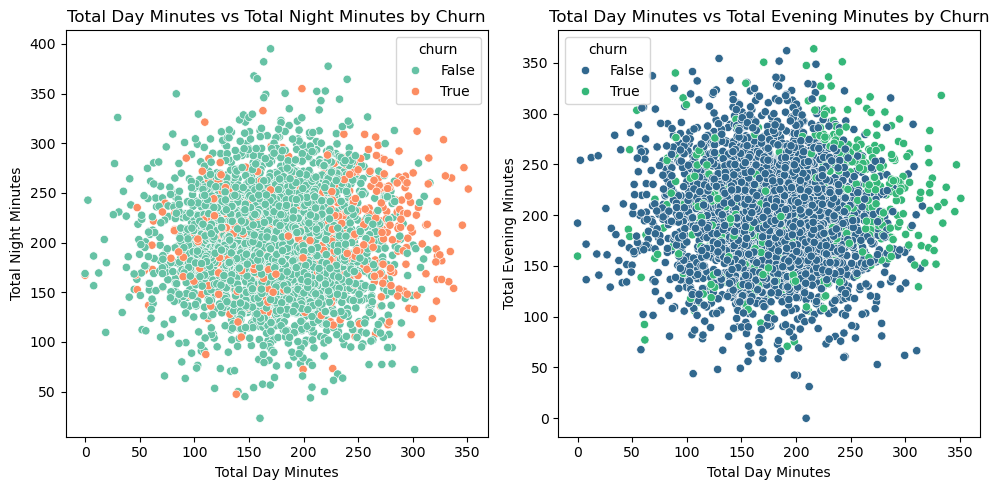

In [43]:

# Scatter plot for total day minutes vs Total Night Minutes by Churn
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

sns.scatterplot(x=df_syria['total day minutes'], 
                y=df_syria['total night minutes'], 
                hue=df_syria['churn'], 
                palette='Set2', ax=axes[0]) 
axes[0].set_title('Total Day Minutes vs Total Night Minutes by Churn')
axes[0].set_xlabel('Total Day Minutes')
axes[0].set_ylabel('Total Night Minutes')

# Scatter plot for total day minutes vs total evening minutes by Churn
sns.scatterplot(x=df_syria['total day minutes'], 
                y=df_syria['total eve minutes'], 
                hue=df_syria['churn'], 
                palette='viridis', ax=axes[1])  
axes[1].set_title('Total Day Minutes vs Total Evening Minutes by Churn')
axes[1].set_xlabel('Total Day Minutes')
axes[1].set_ylabel('Total Evening Minutes')
plt.tight_layout()
plt.show()